In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
train = pd.read_csv(r"C:\Users\luiz\Documents\GitHub\DailyML\Housing Prices\train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Quais os objetivos dessa Análise? 
1. Identificar quais as variáveis que melhor explicam a variação do preço das casas
2. Criar um modelo de regressão que prevê o valor das casas
3. Criar um modelo que identifica se uma casa é uma anomalia com base no restante dos dados (Ad-malicioso, por exemplo)
4. Identificar casas com valores abaixo do valor do mercado

Quais variáveis explicam melhor a variação do preço das casas? 

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin



class DropAndRenameColumns(BaseEstimator, TransformerMixin):

    def __init__(self, drop_cols=None, rename_map=None):

        self.drop_cols = drop_cols or []

        self.rename_map = rename_map or {}


    def fit(self, X, y=None):

        return self


    def transform(self, X):

        X_ = X.copy()

        if self.drop_cols:

            X_ = X_.drop(columns=self.drop_cols, errors="ignore")

        if self.rename_map:

            X_ = X_.rename(columns=self.rename_map)

        return X_

In [ ]:
# Mapping utilizado com base em reposta de IA para tornar os nomes mais descritivos:
value_mapping = {
    # Road and Alley Surfaces
    "Grvl": "Gravel",
    "Pave": "Paved",
    "NA": "No Access",  # Used for alleys and basements
    # Lot Shape
    "Reg": "Regular",
    "IR1": "Slightly Irregular",
    "IR2": "Moderately Irregular",
    "IR3": "Irregular",
    # Land Contour
    "Lvl": "Near Flat/Level",
    "Bnk": "Banked",
    "HLS": "Hillside",
    "Low": "Depression",
    # Utilities
    "AllPub": "All Public Utilities",
    "NoSewr": "No Sewer (Septic Tank)",
    "NoSeWa": "No Sewer or Water",
    "ELO": "Electricity Only",
    # Lot Config
    "Inside": "Inside Lot",
    "Corner": "Corner Lot",
    "CulDSac": "Cul-de-sac",
    "FR2": "Frontage on 2 Sides",
    "FR3": "Frontage on 3 Sides",
    # Land Slope
    "Gtl": "Gentle Slope",
    "Mod": "Moderate Slope",
    "Sev": "Severe Slope",
    # Condition (Condition1 & Condition2)
    "Artery": "Adjacent to Arterial Street",
    "Feedr": "Adjacent to Feeder Street",
    "Norm": "Normal",
    "RRNn": "Near N-S Railroad",
    "RRAn": "Adjacent to N-S Railroad",
    "RRNe": "Near E-W Railroad",
    "RRAe": "Adjacent to E-W Railroad",
    "PosN": "Near Positive Off-site Feature",
    "PosA": "Adjacent to Positive Off-site Feature",
    # Building Type
    "1Fam": "Single-family Detached",
    "2FmCon": "Two-family Conversion",
    "Duplx": "Duplex",
    "TwnhsE": "Townhouse End Unit",
    "TwnhsI": "Townhouse Inside Unit",
    # House Style
    "1Story": "One Story",
    "1.5Fin": "One and Half Story Finished",
    "1.5Unf": "One and Half Story Unfinished",
    "2Story": "Two Story",
    "2.5Fin": "Two and Half Story Finished",
    "2.5Unf": "Two and Half Story Unfinished",
    "SFoyer": "Split Foyer",
    "SLvl": "Split Level",
    # Quality and Condition Ratings
    "Ex": "Excellent",
    "Gd": "Good",
    "TA": "Typical/Average",
    "Fa": "Fair",
    "Po": "Poor",
    # Basement Specific
    "Av": "Average Exposure",
    "Mn": "Minimum Exposure",
    "No": "No Exposure",
    "GLQ": "Good Living Quarters",
    "ALQ": "Average Living Quarters",
    "BLQ": "Below Average Living Quarters",
    "Rec": "Recreation Room",
    "LwQ": "Low Quality",
    "Unf": "Unfinished",
    # Heating
    "Floor": "Floor Furnace",
    "GasA": "Gas Forced Warm Air",
    "GasW": "Gas Hot Water or Steam",
    "Grav": "Gravity Furnace",
    "OthW": "Other Water Heater",
    "Wall": "Wall Furnace",
    # Central Air
    "Y": "Yes",
    "N": "No",
    # Electrical
    "SBrkr": "Standard Circuit Breakers",
    "FuseA": "Fuse Box >60AMP + Romex",
    "FuseF": "60AMP Fuse Box + Mostly Romex",
    "FuseP": "60AMP + Mostly Knob & Tube",
    "Mix": "Mixed Wiring",
    # Kitchen Quality
    # Already mapped above: Ex, Gd, TA, Fa, Po
    # Functional
    "Typ": "Typical Functionality",
    "Min1": "Minor Deductions 1",
    "Min2": "Minor Deductions 2",
    "Mod": "Moderate Deductions",
    "Maj1": "Major Deductions 1",
    "Maj2": "Major Deductions 2",
    "Sev": "Severely Damaged",
    "Sal": "Salvage Only",
    # Fireplace Quality
    # Already mapped above: Ex, Gd, TA, Fa, Po, NA
    # Garage Type
    "2Types": "More than One Type",
    "Attchd": "Attached",
    "Basment": "Basement",
    "BuiltIn": "Built-In",
}

map_zoneamento = {
    "A": "Agriculture",
    "C": "Commercial",
    "FV": "Floating Village Residential",
    "I": "Industrial",
    "RH": "Residential High Density",
    "RL": "Residential Low Density",
    "RP": "Residential Low Density Park ",
    "RM": "Residential Medium Density",
}

In [ ]:
train.replace(value_mapping, inplace=True)

In [36]:
train["MSZoning"] = train["MSZoning"].replace(map_zoneamento)

In [37]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,Residential Low Density,65.0,8450,Paved,NaN,Regular,Near Flat/Level,All Public Utilities,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,Residential Low Density,80.0,9600,Paved,NaN,Regular,Near Flat/Level,All Public Utilities,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,Residential Low Density,68.0,11250,Paved,NaN,Slightly Irregular,Near Flat/Level,All Public Utilities,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,Residential Low Density,60.0,9550,Paved,NaN,Slightly Irregular,Near Flat/Level,All Public Utilities,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,Residential Low Density,84.0,14260,Paved,NaN,Slightly Irregular,Near Flat/Level,All Public Utilities,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Verificando Distribuição de preço de acordo com boxplots. Criando uma função que permita visualizar os dados de acordo com os valores únicos.

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp
import numpy as np
import seaborn as sns


def tabela_de_frequencia(df, col):
    """
    Gera um DataFrame com:
    - Frequência absoluta
    - Frequência relativa (%)
    - Estatísticas de SalePrice (média, mediana, std, min, max, Q1, Q3)
    - p-valor de teste t entre média da categoria vs média geral

    Args:
        df (pd.DataFrame): DataFrame de entrada
        col (str): Nome da coluna categórica a ser analisada

    Returns:
        pd.DataFrame: Tabela resumo com frequências, estatísticas e p-valores
    """

    frequencias = df[col].value_counts(dropna=False)
    frequencias_rel = df[col].value_counts(normalize=True, dropna=False) * 100

    # Média geral de SalePrice (para comparação no teste t)
    media_geral = df["SalePrice"].mean()

    # Estatísticas de SalePrice por categoria
    estatisticas = df.groupby(col)["SalePrice"].agg(
        media="mean",
        mediana="median",
        desvio_padrao="std",
        minimo="min",
        maximo="max",
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75),
    )

    # Calcula p-valor para cada grupo
    pvalores = []
    for valor in estatisticas.index:
        grupo = df[df[col] == valor]["SalePrice"]
        if len(grupo) > 1:
            stat, p = ttest_1samp(grupo, popmean=media_geral, nan_policy="omit")
        else:
            p = np.nan  # Não é possível testar com apenas 1 observação
        pvalores.append(p)

    estatisticas["p_valor"] = pvalores

    # Monta a tabela final
    tabela = pd.DataFrame(
        {
            col: frequencias.index,
            "Frequência Absoluta": frequencias.values,
            "Frequência Relativa (%)": frequencias_rel.values,
        }
    ).set_index(col)

    # Junta com estatísticas
    tabela = tabela.join(estatisticas)

    tabela = tabela.round(2)

    return tabela.reset_index()


def visualizacao_box_plot(df, col):
    """
    Gera um boxplot para a coluna col comparando com SalePrice.

    Parâmetros:
    - df: DataFrame pandas contendo os dados
    - col: string, nome da coluna categórica a ser usada no eixo X
    """
    plt.figure(figsize=(8, 6))
    n_categorias = df[col].nunique()
    paleta = sns.color_palette("Set2", n_colors=n_categorias)
    sns.boxplot(data=df, x=col, y="SalePrice", palette=paleta)
    plt.title(f"Boxplot de SalePrice por {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### A classifação da área Impacta no preço do empreendimento?

C:\Users\luiz\AppData\Local\Temp\ipykernel_22880\2307854922.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y="SalePrice",palette=paleta)


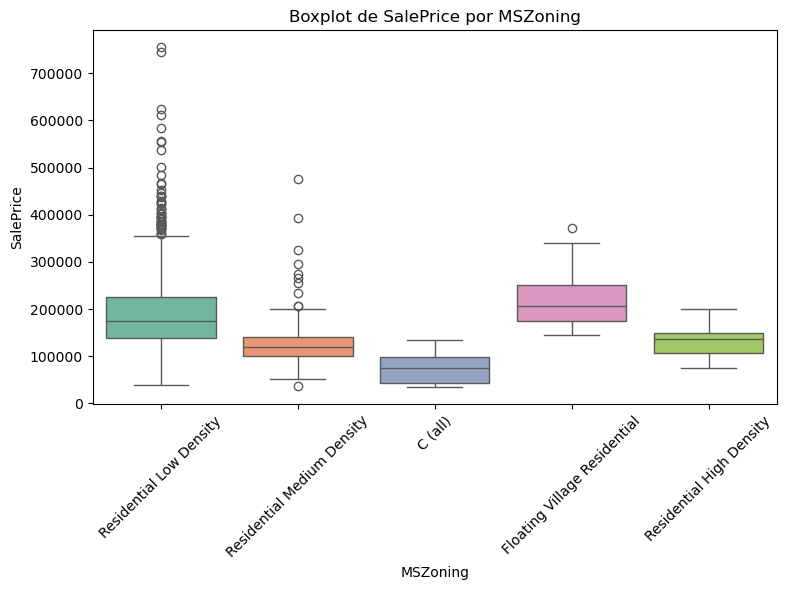

In [ ]:
visualizacao_box_plot(train, "MSZoning")

Os empreendimentos apresentam maiores valores quando relacioandos com floating village residential. Além disso, áreas com baixa densidade apresentam uma variação muito grande de informações, demonstrando que a variável explica pouco sobre como o valor do preço se comporta.

In [ ]:
tabela_de_frequencia(train, "MSZoning").head(10)

,MSZoning,Frequência Absoluta,Frequência Relativa (%),media,mediana,desvio_padrao,minimo,maximo,q25,q75,p_valor
0,Residential Low Density,1151,78.84,191004.99,174000.0,80766.34,39300,755000,137700.00,224700.0,0.0
1,Residential Medium Density,218,14.93,126316.83,120500.0,48521.69,37900,475000,100000.00,140000.0,0.0
2,Floating Village Residential,65,4.45,214014.06,205950.0,52369.66,144152,370878,174000.00,250000.0,0.0
3,Residential High Density,16,1.10,131558.38,136500.0,35714.12,76000,200000,106150.00,148608.5,0.0
4,C (all),10,0.68,74528.00,74700.0,33791.09,34900,133900,43998.25,98332.0,0.0


<Axes: >

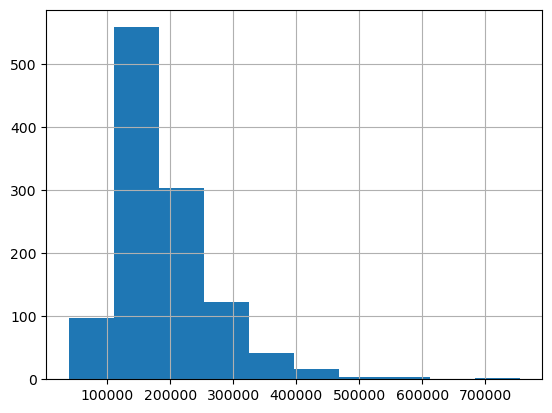

In [58]:
train[train["MSZoning"] == "Residential Low Density"]["SalePrice"].hist()